<a href="https://colab.research.google.com/github/rahulmishra11/Gender_Recognition/blob/main/recognize_gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd

In [8]:
df=pd.read_csv('/voice.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [10]:
df.shape

(3168, 21)

In [11]:
 #Checking is there any Null Value in any feature(column).
 df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [12]:
#Extracting last column of the dataframe.
dfX=df.iloc[:, :-1]
dfY=df.iloc[:,-1]

In [13]:
# Now we need to convert the labels (Male,Female) into Numerical value. To do this we can use one hot encoding
# but since it is label we will just encode Male as 1 and Female as 0.
from sklearn.preprocessing import LabelEncoder
encode_gender=LabelEncoder()
dfY=encode_gender.fit_transform(dfY)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(dfX)
scaler.transform(dfX)

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

In [15]:
#splitting dataset for training and testing purpose
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(dfX,dfY,test_size=0.2,random_state=1)

**SVM**

In [16]:
#importing SVM and metrics for accuracy visualization
from sklearn.svm import SVC
from sklearn import metrics

***USING LINEAR KERNEL***

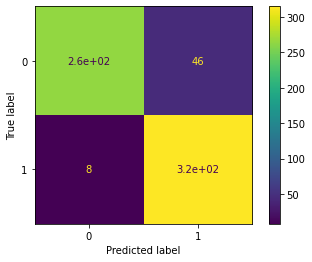

In [17]:
clf=SVC(kernel='linear')
clf.fit(X_train,Y_train)
y_predicted=clf.predict(X_test)
metrics.plot_confusion_matrix(clf,X_test,Y_test)

In [18]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(Y_test, y_predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       311
           1       0.87      0.98      0.92       323

    accuracy                           0.91       634
   macro avg       0.92      0.91      0.91       634
weighted avg       0.92      0.91      0.91       634




In [19]:
print("Accuracy Score :")
print(metrics.accuracy_score(Y_test,y_predicted))

Accuracy Score :
0.9148264984227129


***USING RBF KERNEL***

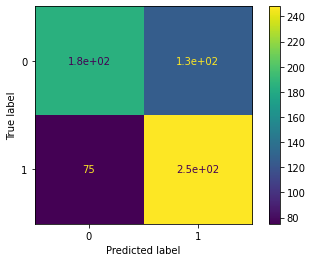

In [20]:
 clf=SVC(kernel='rbf') #by default SVC is RBF kernel
 clf.fit(X_train,Y_train)
 y_predicted=clf.predict(X_test)
 metrics.plot_confusion_matrix(clf,X_test,Y_test)

***USING POLY KERNEL***

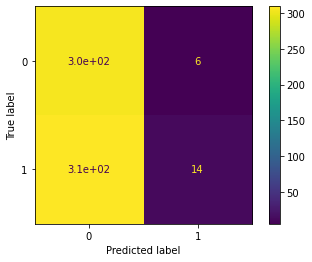

In [21]:
clf=SVC(kernel='poly')
clf.fit(X_train,Y_train)
y_predicted=clf.predict(X_test)
metrics.plot_confusion_matrix(clf,X_test,Y_test)

In [22]:
print("Accuracy Score :")
print(metrics.accuracy_score(Y_test,y_predicted))

Accuracy Score :
0.5031545741324921


#**Cross Validation**

*with respect to hyperparameter c*

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
#Linear SVM
clf=SVC(kernel='linear')
scores=cross_val_score(clf,dfX,dfY,cv=10,scoring='accuracy')
print(scores)

[0.72239748 0.94321767 0.84542587 0.96214511 0.94006309 0.99684543
 0.97791798 0.96845426 0.9335443  0.90189873]


In [25]:
print(scores.mean())

0.9191909914946292


In [26]:
#RBF Kernel
clf=SVC()
scores=cross_val_score(clf,dfX,dfY,cv=10,scoring='accuracy')
print(scores)

[0.51104101 0.5488959  0.63722397 0.69716088 0.73501577 0.76971609
 0.75394322 0.67192429 0.61075949 0.65189873]


In [27]:
print(scores.mean())

0.658757936349479


In [28]:
#Poly Kernel
clf=SVC(kernel='poly')
scores=cross_val_score(clf,dfX,dfY,cv=10,scoring='accuracy')
print(scores)

[0.58044164 0.53943218 0.45425868 0.5615142  0.50157729 0.50157729
 0.50157729 0.50157729 0.48417722 0.50316456]


In [29]:
print(scores.mean())

0.5129297608114044


In [30]:
# Now we can also use Cross Validation to find accurate value of C and gamma for SVM.